In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [14]:
data = pd.read_csv('IMDB_Dataset.csv')

In [15]:
data.dropna(inplace=True)

In [22]:
def clean_review(review):
    stop_words = set(stopwords.words('english'))
    cleaned_review = ' '.join(word for word in review.split() if word.lower() not in stop_words)
    return cleaned_review
data['review'] = data['review'].apply(clean_review)

In [25]:
from wordcloud import WordCloud

In [29]:
data

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically there's family little boy (Jake) thi...,negative
4,"Petter Mattei's ""Love Time Money"" visually stu...",positive
...,...,...
495,"""American Nightmare"" officially tied, opinion,...",negative
496,"First off, say loved book Animal Farm. read 9t...",negative
497,movie extremely boring. laughed times. decided...,negative
498,"disgusted movie. graphic sex scenes, ruined im...",negative


In [42]:
stop_words = stopwords.words('english')
print(stop_words[:10]) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


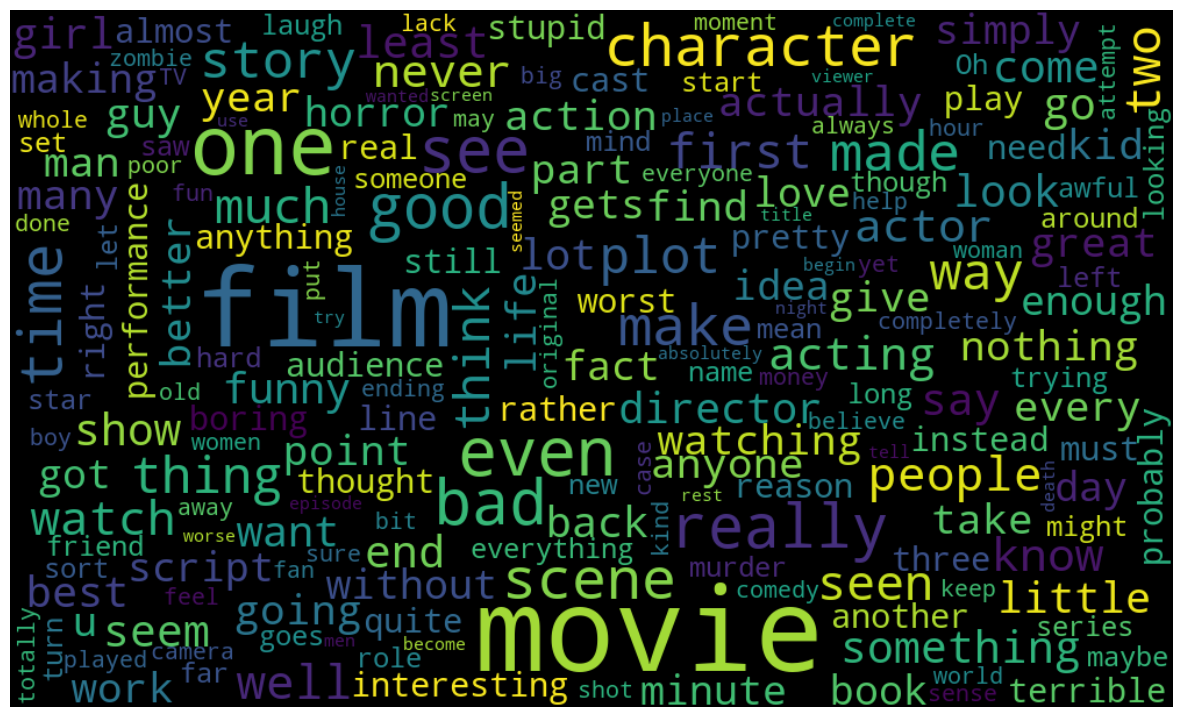

In [49]:
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))
if reviews.strip():
    wordcloud = WordCloud(height=600, width=1000, max_font_size=100)

   # Display the word cloud
    plt.figure(figsize=(15, 12))
    plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No words available to generate the word cloud.")

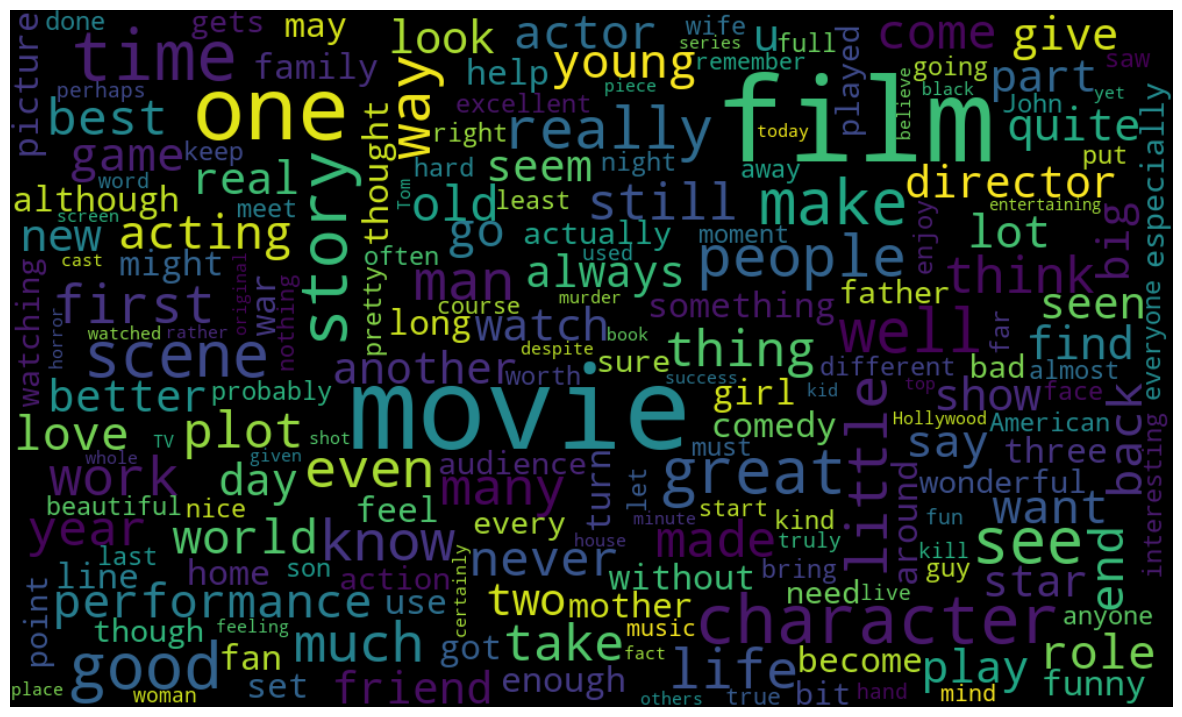

In [50]:
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'positive'].astype(str))
if reviews.strip():
    wordcloud = WordCloud(height=600, width=1000, max_font_size=100)

   # Display the word cloud
    plt.figure(figsize=(15, 12))
    plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No words available to generate the word cloud.")

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
reviews = cv.fit_transform(data['review']).toarray()

In [52]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [54]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score
predict = model.predict(reviews_test)
y_pred = model.predict( reviews_test)
accuracy = accuracy_score(sent_test, y_pred)
print(accuracy)

0.76


In [60]:
import pickle as pk
pk.dump(model,open('model.pkl','wb'))
pk.dump(cv,open('scaler.pkl','wb'))